GE 254 - Intro to Geomorph
HW 1 - Using Python to calculate Flood Frequency Analysis

Due: Thursday Sept. 24th by 11 am

For this assignment, we will be taking the work we did in excel on flood frequency and instead creating a python script to do the same thing. You will be given a partially done code. You need to finish the code. Answer any questions shown as comments in the code. And most importantly, comment the code extensively. The end result should be a useful python script that takes any USGS flow data and calculates predictive flood frequency analysis. 

Objectives:
    1. Practice using Python Pandas DataFrames to import, manipulate, and visualize data
    2. Learn some powerful tools for subsetting your dataframes
    3. Practice visualizing data 

In [2]:
#import libraries

#let's use pandas dataframes again
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #so I've imported 3 libraries using common 
#abbreviations to reference these libraries in my code. This is personal choice.
#If I just wrote "import numpy", it would still work but when I call a numpy command
#I would have to write numpy.matrix() vs. np.matrix() - it's all about laziness
#and minimizing typing.

First make sure you've downloaded the correct data. I want you to download peak flow measurements for 1 of these four sites (you will be assigned in class):02086849, . I also want you to download daily data for your site, on the waterdata.usgs.gov/nwis/sw site click on daily data instead of peak-flow data. Remember to download all available data for discharge and gage height (if available). Remember to select tab-separated file then download that file as a .txt, by right clicking on the page and selecting "save as".  

Let's start by reading in the peak-flow measurements - this is similar to what we did in Lab 2

In [3]:
#ok let's break down this command - can you tell me what header does?
#what is the delimiter mean?
# why did I write skiprows?
#what is usecols do?
#for help with this use google - or go to the help menu above and select pandas
peak_all = pd.read_csv('peak_02086849.txt',header=72,delimiter="\t",\
                       skiprows=[73],usecols=range(0,8),parse_dates=True)
peak_all.head()

#if for some reason when peak is displayed below and you see weird values
#in the first couple of rows, you need to adjust the values given to header
#and skiprows. 

,agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd
0,USGS,2086849,1983-05-20,NaN,2470.0,NaN,11.05,NaN
1,USGS,2086849,1984-04-05,NaN,2470.0,NaN,11.03,NaN
2,USGS,2086849,1985-02-01,NaN,1950.0,NaN,9.35,NaN
3,USGS,2086849,1986-08-20,NaN,2830.0,NaN,12.10,NaN
4,USGS,2086849,1987-04-16,NaN,1560.0,NaN,8.01,NaN


In [4]:
#now let's rename these columns to something a bit more useful
new_column_names = ['Agency', 'SiteNo', 'Date', 'Time', \
                    'Discharge (cfs)', 'Discharge_quality','Gage_ht (ft)',\
                    'Gage_quality']
#ok now what does the "\" do in the above line of code?

In [5]:
peak_all.columns = new_column_names

In [6]:
peak_all.head()

,Agency,SiteNo,Date,Time,Discharge (cfs),Discharge_quality,Gage_ht (ft),Gage_quality
0,USGS,2086849,1983-05-20,NaN,2470.0,NaN,11.05,NaN
1,USGS,2086849,1984-04-05,NaN,2470.0,NaN,11.03,NaN
2,USGS,2086849,1985-02-01,NaN,1950.0,NaN,9.35,NaN
3,USGS,2086849,1986-08-20,NaN,2830.0,NaN,12.10,NaN
4,USGS,2086849,1987-04-16,NaN,1560.0,NaN,8.01,NaN


In [7]:
#now for some data cleanup
peak_all['Discharge (m3/sec)'] = peak_all['Discharge (cfs)'] * 0.028316847
peak_all['Gage_ht (m)'] = peak_all['Gage_ht (ft)'] * 3.28084
new_station_name = "0" + str(peak_all['SiteNo'].unique()[0])
peak_all['SiteNo'] = new_station_name
peak_all.head()

,Agency,SiteNo,Date,Time,Discharge (cfs),Discharge_quality,Gage_ht (ft),Gage_quality,Discharge (m3/sec),Gage_ht (m)
0,USGS,02086849,1983-05-20,NaN,2470.0,NaN,11.05,NaN,69.942612,36.253282
1,USGS,02086849,1984-04-05,NaN,2470.0,NaN,11.03,NaN,69.942612,36.187665
2,USGS,02086849,1985-02-01,NaN,1950.0,NaN,9.35,NaN,55.217852,30.675854
3,USGS,02086849,1986-08-20,NaN,2830.0,NaN,12.10,NaN,80.136677,39.698164
4,USGS,02086849,1987-04-16,NaN,1560.0,NaN,8.01,NaN,44.174281,26.279528


In [11]:
#the fun date-time work
peak_all['Date'] = pd.to_datetime(peak_all.Date)
peak_all['Year'] = peak_all['Date'].dt.year
peak_all.head
#explain what the above lines of code do please

<bound method NDFrame.head of    Agency    SiteNo       Date   Time  Discharge (cfs)  Discharge_quality  \
0    USGS  02086849 1983-05-20    NaN           2470.0                NaN   
1    USGS  02086849 1984-04-05    NaN           2470.0                NaN   
2    USGS  02086849 1985-02-01    NaN           1950.0                NaN   
3    USGS  02086849 1986-08-20    NaN           2830.0                NaN   
4    USGS  02086849 1987-04-16    NaN           1560.0                NaN   
5    USGS  02086849 1988-08-29    NaN            808.0                NaN   
6    USGS  02086849 1992-03-07    NaN           1450.0                NaN   
7    USGS  02086849 1993-03-04    NaN           2360.0                NaN   
8    USGS  02086849 1994-03-03    NaN           1630.0                NaN   
9    USGS  02086849 1995-06-29    NaN              NaN                NaN   
10   USGS  02086849 2006-09-05    NaN           1770.0                NaN   
11   USGS  02086849 2006-12-25    NaN         

In [14]:
#ok now that we've done some data management, let's pull out only the data we need
peak = peak_all[['Year','Discharge (m3/sec)','Gage_ht (m)']]

#now let's remove NaN  measurements
peak = peak.dropna()
print(peak)

    Year  Discharge (m3/sec)  Gage_ht (m)  Discharge (cfs)
0   1983           69.942612    36.253282           2470.0
1   1984           69.942612    36.187665           2470.0
2   1985           55.217852    30.675854           1950.0
3   1986           80.136677    39.698164           2830.0
4   1987           44.174281    26.279528           1560.0
5   1988           22.880012    15.879266            808.0
6   1992           41.059428    30.708662           1450.0
7   1993           66.827759    37.762468           2360.0
8   1994           46.156461    32.775592           1630.0
10  2006           50.120819    30.183728           1770.0
11  2006           56.916862    32.972442           2010.0
13  2009           49.554482    30.019686           1750.0
14  2009           66.827759    36.745408           2360.0
15  2011           56.633694    32.841208           2000.0
16  2012           55.784189    32.545933           1970.0
17  2013           70.792118    37.335959           2500

In [15]:
peak = peak.sort_values('Discharge (m3/sec)',ascending=False)
peak.head()

,Year,Discharge (m3/sec),Gage_ht (m),Discharge (cfs)
22,2018,88.914900,42.519686,3140.0
21,2016,88.631731,42.486878,3130.0
3,1986,80.136677,39.698164,2830.0
23,2018,75.889150,38.779529,2680.0
20,2015,75.889150,38.779529,2680.0


In [16]:
peak['Rank'] = range(1,peak.shape[0]+1)
n = peak.shape[0]
print('The total number of observations:', n)
print(peak.head())

The total number of observations: 22
    Year  Discharge (m3/sec)  Gage_ht (m)  Discharge (cfs)  Rank
22  2018           88.914900    42.519686           3140.0     1
21  2016           88.631731    42.486878           3130.0     2
3   1986           80.136677    39.698164           2830.0     3
23  2018           75.889150    38.779529           2680.0     4
20  2015           75.889150    38.779529           2680.0     5


In [17]:
#helpful description of indexing dataframes in python & pandas
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

peak['Recurrence Interval (years)'] = (1 + n)/peak['Rank']
print(peak.head())

    Year  Discharge (m3/sec)  Gage_ht (m)  Discharge (cfs)  Rank  \
22  2018           88.914900    42.519686           3140.0     1   
21  2016           88.631731    42.486878           3130.0     2   
3   1986           80.136677    39.698164           2830.0     3   
23  2018           75.889150    38.779529           2680.0     4   
20  2015           75.889150    38.779529           2680.0     5   

    Recurrence Interval (years)  
22                    23.000000  
21                    11.500000  
3                      7.666667  
23                     5.750000  
20                     4.600000  


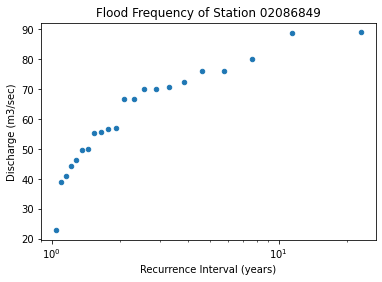

In [18]:
#ok now to plot data
peak.plot(x='Recurrence Interval (years)',y='Discharge (m3/sec)',\
          title='Flood Frequency of Station ' + peak_all['SiteNo'][0], \
          kind='scatter',logx=True)

In [19]:
#add the trendline
x = peak['Recurrence Interval (years)']
y = peak['Discharge (m3/sec)']
f = np.polyfit(np.log10(x),y,1,w=np.sqrt(y))
print(f)
xf = [min(x),max(x)]
yf = f[0]*np.log10(xf) + f[1]
print(xf,yf)

[38.10465087 46.83815159]
[1.0454545454545454, 23.0] [47.57376779 98.72631536]


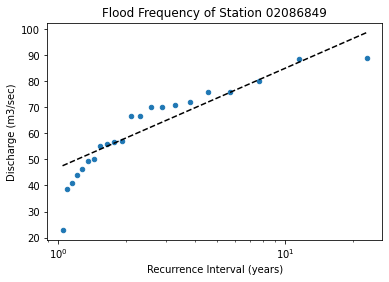

In [20]:
ax = peak.plot(x='Recurrence Interval (years)',y='Discharge (m3/sec)',\
          title='Flood Frequency of Station ' + peak_all['SiteNo'][0], \
          kind='scatter',logx=True)
plt.plot(xf,yf,'k--')

In [21]:
#What is the 100 year flood discharge? 
dis100 = f[0]*np.log10(100) + f[1]
print('the 100 year discharge is:', dis100, 'm3/s')

the 100 year discharge is: 123.04745333205895 m3/s


In [ ]:
#now lets look at the rating curve - aka stage vs. discharge
peak.plot(x='Discharge (m3/sec)',y='Gage_ht (m)', \
          title='Rating Curve of Station ' + peak_all['SiteNo'][0], \
          kind='scatter')

#can you fit a line to this plot? For predicting discharge for a given stage?
x2 = peak['Discharge (m3/sec)']
y2 = peak['Gage_ht (m)']
f2 = np.polyfit(x2,y2,1)

xf2 = np.array([min(x2),max(x2)])
yf2 = f2[0]*xf2 + f2[1]
print(xf2,yf2)
plt.plot(xf2,yf2,'k--')

In [ ]:
#what is the predicted stage for the 100 year flood?
stg100 = f2[0]*dis100 + f2[1]
print('the 100 year flood stage is:', stg100, 'm')

Ok now that we've recreated flood recurrence interval analysis, what would you have to change to run this code on a different USGS station? What parameters might be different? What would you expect to be the same? How easy would it be to change these things?

Let's look at other methods for visualizing and analyzing daily flow measurements. 

In [ ]:
#alright nice job - now let's look at daily measurements.
daily_all = pd.read_csv('daily_02086849.txt',header=32,delimiter="\t",\
                        skiprows=[33],usecols=[0,1,2,3,9],parse_dates=True)
daily_all.head()
#again - note the header and skip-row number, these might need to change
#for your file..

In [ ]:
new_column_names = ['Agency', 'SiteNo', 'OldDateTime', \
                    'Discharge (cfs)', 'Gage_ht (ft)']
daily_all.columns = new_column_names
daily_all

In [ ]:
#now for some data cleanup
daily_all['Discharge (m3/sec)'] = daily_all['Discharge (cfs)'] * 0.028316847
peak_all['Gage_ht (m)'] = peak_all['Gage_ht (ft)'] * 3.28084
new_station_name = "0" + str(daily_all['SiteNo'].unique()[0])
daily_all['SiteNo'] = new_station_name


In [ ]:
#why do I keep printing out/displaying daily_all or peak or peak_all? 
#what is the use or reason for this in the code? 
#what are other methods you can use to check your code validity?

In [ ]:
daily_all['DateTime'] = pd.to_datetime(daily_all['OldDateTime'])
daily_all['Year'] = daily_all['DateTime'].dt.year
daily_all['Month'] = daily_all['DateTime'].dt.month
daily_all['Day'] = daily_all['DateTime'].dt.day
print(daily_all.head())

In [ ]:
#ok how can you now find the average flow for your birthday?
avgdis_bday = daily_all['Discharge (m3/sec)'][((daily_all.Month==7)&(daily_all.Day==7))].mean()

print('The average discharge for 7/7 is: ', avgdis_bday, 'm3/sec')
#go ahead and redo this to find the minimum, maximum, and mean flow for YOUR birthday

In [ ]:
#now go ahead and plot the daily average flow (aka average per day)
#this is how we use the very useful function group by

avg_daily = daily_all.groupby(['Month','Day'],as_index=False).mean()
#ok how does the above line of code work? Look up groupby and explain what is done.

avg_daily.Year = 2000 #random year chosen - must be a leap year for datetime to work!


In [ ]:
avg_daily['Date'] = pd.to_datetime(avg_daily[['Year','Month','Day']])


In [ ]:
#now go ahead and plot your avg daily value
avg_daily.plot(x='Date',y='Discharge (m3/sec)',\
               title='Averaged Daily Flow of Station ' + peak_all['SiteNo'][0], \
              kind='scatter')

#now can you plot a monthly mean? Let's use the groupby again
avg_m = daily_all.groupby(['Month'],as_index=False).mean()
avg_m['Day'] = 15 #add in a fake day
avg_m['Year'] = 2000 #add in a fake year that fits the data - make sure it matches above
avg_m['Date'] = pd.to_datetime(avg_m[['Year','Month','Day']])
print(avg_m)
plt.plot(avg_m.Date,avg_m['Discharge (m3/sec)'],'--m',linewidth=4)

#does the monthly average match the daily averages values - are the trends holding?

In [ ]:
print(daily_all.head())

#now let's talk about calc. the per month average flow over our timeseries (aka resample our data)
#look at this or some helpful information https://sergilehkyi.com/tips-on-working-with-datetime-index-in-pandas/

In [ ]:
daily_all2 = daily_all.set_index('DateTime')
print(daily_all2.head())

In [ ]:
ma = daily_all2.resample('M').mean() #look up what this command does - this can be very powerful

In [ ]:
print(ma.head())
print(daily_all2.head())

In [ ]:
daily_all.plot(x='DateTime', y='Discharge (m3/sec)',kind='scatter')
plt.plot(ma.index,ma['Discharge (m3/sec)'],"--k",linewidth=3)